### predicting the sale price of bulldozers

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn


##  1. Problem definition
how can we can we predict the future sale price of a bulldozer given its characteristics and previous examples 
##  2. Data
The data is downloaded from the kaggle bluebook for bulldozers competition:
Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set.
Test.csv is the test set
##  3.evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
**NOTE:** the goal for most of thr regression evaluation metrics is to minimize the error.
##  4.Features
kaggle provides a data dictionary detailing all of the features of the dataset. It can be viewed on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing


In [3]:
#import training and validation sets
df=pd.read_csv("Data/TrainAndValid.csv",low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

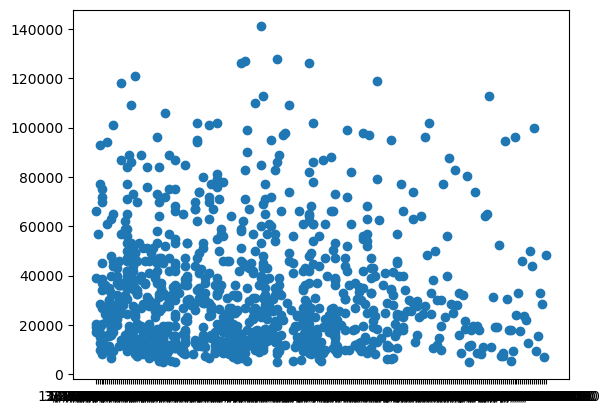

In [10]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [18]:
df["saledate"].dtype

dtype('O')

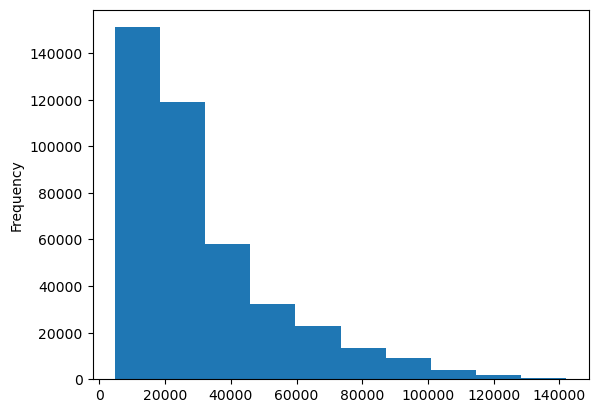

In [12]:
df.SalePrice.plot.hist();

### parsing dates
when we work with time series data, we want to enrich the time and date component as much as possible.
we can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter.


In [19]:
# import data again but this time parse dates
df= pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [20]:
df.saledate.dtype

dtype('<M8[ns]')

In [21]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [22]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

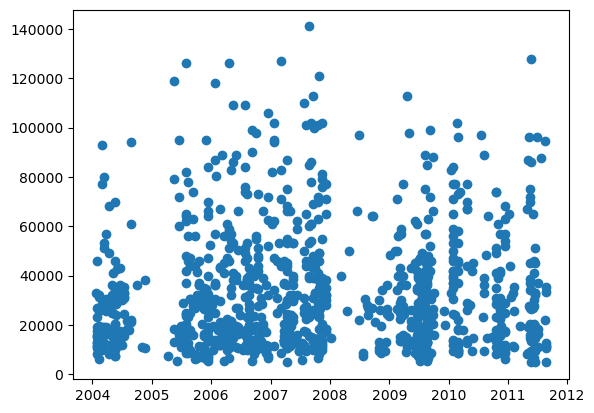

In [25]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [26]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [29]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### sort dataframe by saledate
when working with timeseries data its a good idea to sort it by date

In [31]:
# sort dataframe in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy
we wake a copy of the original dataframe so when we manipulate the copy. we have still got the original data.

In [34]:
#make a copy
df_temp=df.copy()

In [35]:
df_temp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Feature engineering
creation of new features from given features

### Add date time parameter for saledate column


In [43]:
df_temp["saleyear"]=df_temp.saledate.dt.year
df_temp["salemonth"]=df_temp.saledate.dt.month
df_temp["saleday"]=df_temp.saledate.dt.day
df_temp["saledayofweek"]=df_temp.saledate.dt.dayofweek
df_temp["saledayofyear"]=df_temp.saledate.dt.dayofyear

In [44]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [46]:
#now we enriched our dataframe with datetime features, we can remove the saledate from df_temp
df_temp.drop("saledate",axis=1,inplace=True)

In [48]:
# check the avales of diff columns
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5.modelling 
we have done enough EDA and lets start with model driven EDA

In [49]:
#lets build a ml model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [53]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [52]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### convert strings to categories
One way we can turn all of our data into numbers is by converting them into pandas categories.
https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html

In [57]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [73]:
pd.api.types.is_object_dtype(df_temp["ProductSize"])

True

In [38]:
#find the columns which contains strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# This will turn all the strings into category value
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [40]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

In [41]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [42]:
df_temp.state.cat.codes

0         43
1          8
2          8
3          8
4          8
          ..
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

In [43]:
df_temp.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [44]:
df_temp.UsageBand.cat.codes

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
412693   -1
412694   -1
412695   -1
412696   -1
412697   -1
Length: 412698, dtype: int8

In [45]:
#check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                                0.000000
SalePrice                              0.000000
MachineID                              0.000000
ModelID                                0.000000
datasource                             0.000000
auctioneerID                           0.000000
YearMade                               0.000000
MachineHoursCurrentMeter               0.000000
UsageBand                              0.821492
fiModelDesc                            0.000000
fiBaseModel                            0.000000
fiSecondaryDesc                        0.340993
fiModelSeries                          0.857845
fiModelDescriptor                      0.818715
ProductSize                            0.524851
fiProductClassDesc                     0.000000
state                                  0.000000
ProductGroup                           0.000000
ProductGroupDesc                       0.000000
Drive_System                           0.740520
Enclosure                              0

### save preprocessed data 

In [80]:
#export current temp dataframe
df_temp.to_csv("Data/train_temp.csv",index=False)

In [182]:
#import preprocessed data
df_temp=pd.read_csv("Data/train_temp.csv",low_memory=False)

### Fill missing values
## Fill numeric missing values

In [183]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [167]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [168]:
# check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [184]:
#fill numeric rows with the medians
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary coulmn which tells us if the data was missing 
            df_temp[label+"_is_missing"]=pd.isnull(content)
            # fill missing numeric values with median
            df_temp[label]=content.fillna(content.median())

In [170]:
# demo how median is more robust than mean
hundreds=np.full((1000,),100)
hundred_billion=np.append(hundreds,1000000000)
np.mean(hundreds),np.mean(hundred_billion),np.median(hundreds),np.median(hundred_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [185]:
# check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [172]:
#check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [173]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### filling and turning catagorical variables into numbers

In [186]:
#check for columns which are not numeric
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [53]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [187]:
#turn categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary coulmn which tells us if the data was missing 
        df_temp[label+"_is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label]=pd.Categorical(content).codes+1

In [176]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [188]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [178]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Modelling

In [179]:
%%time
#lets build a ml model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

CPU times: total: 42min 23s
Wall time: 5min 35s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [75]:
#score the model
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.987551349795339

**Question:** why does not the above metric reliable?

### splitting data into train/validation sets

In [76]:
df_temp.saleyear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleyear, Length: 412698, dtype: int64

In [77]:
df_temp.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [189]:
#split data into trainig and valid sets
df_val = df_temp[df_temp.saleyear==2012]
df_train=df_temp[df_temp.saleyear!=2012]
len(df_val),len(df_train)

(11573, 401125)

In [190]:
#split data into X and Y
X_train,Y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,Y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [191]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [80]:
Y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### building an evaluation function


In [89]:
#create evaluation function(competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score
def rmsle(Y_test,Y_preds):
    """
    calculate rmsle between predictions and true labels. 
    """
    return np.sqrt(mean_squared_log_error(Y_test,Y_preds))
#create function to evaluate model on few different labels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Training MAE":mean_absolute_error(Y_train,train_preds),
           "Valid MAE":mean_absolute_error(Y_valid,val_preds),
           "Trainig RMSLE":rmsle(Y_train,train_preds),
           "Valid RMSLE":rmsle(Y_valid,val_preds),
           "Training R^2":r2_score(Y_train,train_preds),
           "Valid R^2":r2_score(Y_valid,val_preds)}
    return scores

### testing our model on a subset(to tune the hyperparameters)

In [82]:
len(X_train)

401125

In [ ]:
#one option to reduce time
# model.fit(X_train[:10000],Y_train[:10000])

In [86]:
%%time
# change max_samples value
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
#cutting down on th enumber of max_samples each estimator can see improves training time
model.fit(X_train,Y_train)

CPU times: total: 1min 18s
Wall time: 12 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [85]:
10000*100

1000000

In [90]:
show_scores(model)

{'Training MAE': 5567.236797232783,
 'Valid MAE': 7167.089238745356,
 'Trainig RMSLE': 0.25797216373820187,
 'Valid RMSLE': 0.293211735920372,
 'Training R^2': 0.8605325040104918,
 'Valid R^2': 0.8326021487668128}

### Hyperparameter tuning with RandomizedSearchCV


In [100]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# different RandomForestRegressor hyperparameters
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}
#initiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=100,cv=5,verbose=True)
#fit the RandomizedSearchCV model
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\dell\Desktop\ML\bulldozer-price-prediction\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
95 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\Desktop\ML\bulldozer-price-prediction\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\Desktop\ML\bulldozer-price-prediction\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dell\Desktop\ML\bulldozer-price-prediction\env\Lib\site-packages\sklearn\ba

CPU times: total: 41min 14s
Wall time: 10min 52s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [101]:
#find best model hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [102]:
#evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5860.817579693694,
 'Valid MAE': 7247.621455977685,
 'Trainig RMSLE': 0.26832503159913174,
 'Valid RMSLE': 0.2960452029875285,
 'Training R^2': 0.846157904253017,
 'Valid R^2': 0.8293572696331446}

In [238]:
%%time
#most ideal model
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)
#fit the ideal model
ideal_model.fit(X_train,Y_train)

CPU times: total: 8min
Wall time: 1min 2s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [104]:
show_scores(ideal_model)

{'Training MAE': 2949.370825582429,
 'Valid MAE': 5956.613181856461,
 'Trainig RMSLE': 0.14443748823161592,
 'Valid RMSLE': 0.24614543130162314,
 'Training R^2': 0.9589790407606988,
 'Valid R^2': 0.8815412159453595}

## make predictions on test data

In [224]:
#import test data
df_test=pd.read_csv("data/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [225]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

## preprocessing data


In [226]:
def preprocess_data(df):
    """
    perform transformation on df and returns transformed df.
    """
    df["saleyear"]=df.saledate.dt.year
    df["salemonth"]=df.saledate.dt.month
    df["saleday"]=df.saledate.dt.day
    df["saledayofweek"]=df.saledate.dt.dayofweek
    df["saledayofyear"]=df.saledate.dt.dayofyear
    df.drop("saledate",axis=1,inplace=True)
    #manually adjust df_test to have auctioneerID_is_missing column
    #features should be in the same order
    df["auctioneerID_is_missing"]=False
    #fill numeric rows with the medians
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary coulmn which tells us if the data was missing 
                df[label+"_is_missing"]=pd.isnull(content)
                # fill missing numeric values with median
                df[label]=content.fillna(content.median())
        #turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary coulmn which tells us if the data was missing 
            df[label+"_is_missing"]=pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label]=pd.Categorical(content).codes+1
    return df

In [227]:
#process test data
df_test=preprocess_data(df_test)

In [234]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [231]:
X_train.columns


Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

# 101!=102
no of columns must be equal in train and test data sets

In [198]:
# we can find how the columns differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [236]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [212]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [211]:
X_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [240]:
#make predictions over test set
test_preds=ideal_model.predict(df_test)

In [241]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [242]:
#format predictions into the same format kaggle wants
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [243]:
#export prediction data
df_preds.to_csv("data/test_predictions.csv",index=False)

### feature importance
feature importance seeks to figure out which different attributes of data were most importnace when it comes to predicting the  ***target variable*** (SalePrice)

In [246]:
#find feature importance of our best models
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [254]:
#helper function for plotting feature importance of top 20
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
       .reset_index(drop=True))
    #plot dataframe
    #barh=horizontal bar
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("features")
    ax.set_xlabel("features_importnaces")
    ax.invert_yaxis()

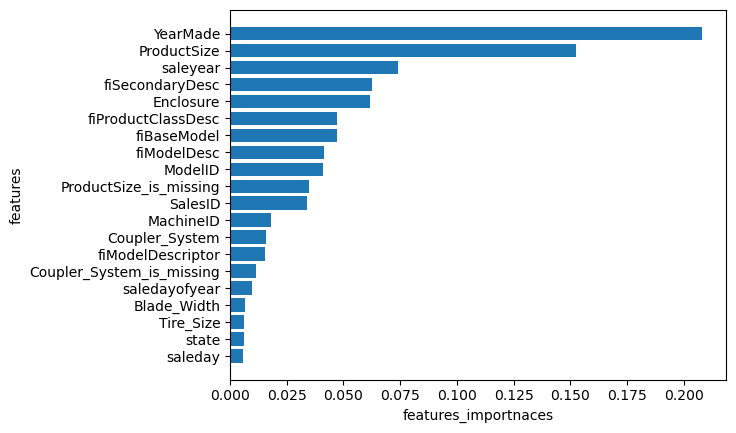

In [255]:
plot_features(X_train.columns,ideal_model.feature_importances_)